# Waffle Plots

One alternative univariate plot type that you might see for categorical data is the waffle plot, also known as the square pie chart. While the standard pie chart uses a circle to represent the whole, a waffle plot is plotted onto a square divided into a 10x10 grid. Each small square in the grid represents one percent of the data, and a number of squares are colored by category to indicate total proportions. Compared to a pie chart, it is much easier to make precise assessments of relative frequencies.


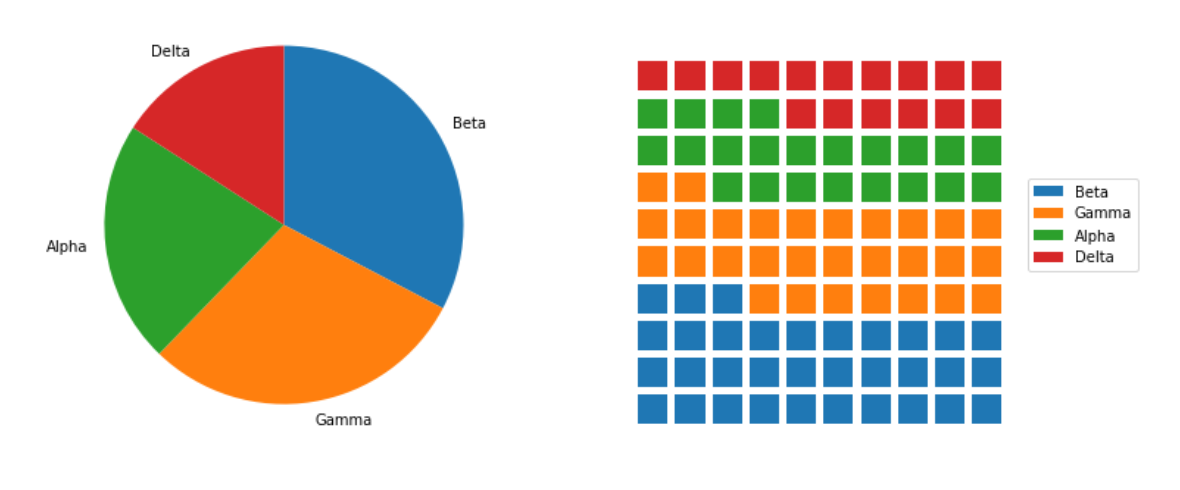

here's no built-in function for waffle plots in Matplotlib or Seaborn, so we'll need to take some additional steps in order to build one with the tools available. First, we need to create a function to decide how many blocks to allocate to each category. The function below, **percentage_blocks**, uses a rule **where each category gets a number of blocks equal to the number of full percentage points it covers**. The remaining blocks to get to the full one hundred are assigned to the categories with the largest fractional parts.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df=pd.read_csv('../Code/pokemon.csv')
df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [27]:
def percentage_blocks(df, var):
    """
    Take as input a dataframe and variable, and return a Pandas series with
    approximate percentage values for filling out a waffle plot.
    """
    # compute base quotas
    percentages = 100 * df[var].value_counts() / df.shape[0]
    counts = np.floor(percentages).astype(int) # integer part = minimum quota
    decimal = (percentages - counts).sort_values(ascending = False)

    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1

    return counts

Now it's time to actually plot those counts as boxes in the waffle plot form. To do this, we'll make use of **Matplotlib's bar function**. We could have used this function earlier  to create our bar charts instead of Seaborn's countplot, but it would have required us to aggregate the data first to get the height of each bar. For the case of the waffle plot, we're going to specify the x- and y- coordinates of the boxes, and set their widths and heights to be equal, to create squares. The initial plotting code looks like this:

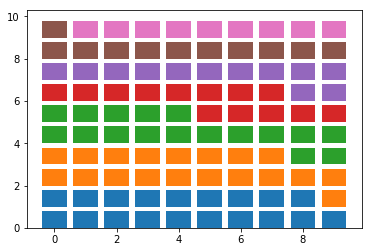

In [49]:
waffle_counts = percentage_blocks(df, 'generation_id')

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts.iloc[cat])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts.iloc[cat]

The last steps that we need to do involve aesthetic cleaning to polish it up for interpretability. We can take away the plot border and ticks, since they're arbitrary, but we should change the limits so that the boxes are square. We should also add a legend so that the mapping from colors to category levels is clear.

(-0.8900000000000001, 9.89, 0.0, 10.780000000000001)

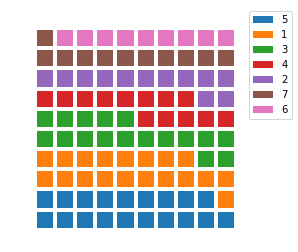

In [61]:
waffle_counts = percentage_blocks(df, 'generation_id')

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts.iloc[cat])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts.iloc[cat]

# aesthetic wrangling
plt.legend(waffle_counts.index,bbox_to_anchor=(1,.75),loc=6)
plt.axis('off')
plt.axis('square')

The two calls to Matplotlib's axis function make use of two convenience strings for arguments: 'off' removes the axis lines, ticks, and labels, while 'square' ensures that the scaling on each axis is equal within a square bounding box. 

As for the legend call, the first argument is a list of categories as obtained from the sorted waffle_counts Series variable. This will match each category to each bar call, in order. The "bbox_to_anchor" argument sets an anchor for the legend to the right side of the plot, and "loc = 6" positions the anchor to the center left of the legend. The final plot is as it looks at the top of the page:

Other variants of the waffle plot exist to extend it beyond just displaying probabilities. By associating each square with an amount rather than a percentage, we can use waffle plots to show absolute frequencies instead. This might cause us to end up with something other than 100 squares.

(-1.2650000000000001, 17.765, 0.0, 19.03)

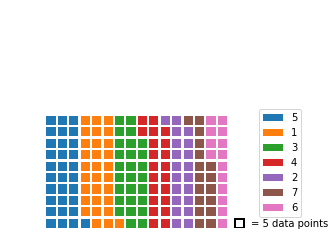

In [96]:
# each box represents five full counts
waffle_counts = (df['generation_id'].value_counts() / 5).astype(int)

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts.iloc[cat])
    # and put a block at each index's location
    y = blocks % 10 # use mod operation to get ones digit
    x = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts.iloc[cat]

    

# box size legend
plt.bar(16.5, 0.8, 0.8, color='white', edgecolor='black', lw=2)
plt.text(17.5,0.4,'= 5 data points',va='center')

# aesthetic wrangling
plt.legend(waffle_counts.index, bbox_to_anchor = (1, 0.3), loc = 6)
plt.axis('off')
plt.axis('square')

In the above code, waffle_counts has been adjusted so that each box represents 5 data points. Most of the code is the same as before, though it should be noted that the x and y variables have been swapped in the bar function so that the boxes are plotted in columns from left to right. Additional bar and text calls have been added to the plot to act as an ad hoc legend. The positions of these elements, and the legend, have been adjusted manually through some trial and error to improve the aesthetic appeal. Note that this constitutes more of an explanatory polishing than it is a part of exploration!